In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Imputer
#from sklearn.impute import SimpleImputer as Imputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Load Data

In [2]:
jokesData = pd.read_excel('data/raw/jesterfinal151cols.xls', header = None)

## Process data

In [3]:
# Remove jokes that have never been rated.
jokesData = jokesData.drop(columns=[0,1,2,3,4,5,6,9,10,11,12,14,20,27,31,43,51,52,61,73,80,100,116])

# Remove nan on row 50691
jokesData = jokesData.fillna(value=99.0)

In [4]:

def normalize_(X):
    
    # Create means for each joke across training data
    joke_mean = []
    joke_std = []
    X_normalized = np.copy(X)
    for joke in X.T:
        joke_mean.append(np.mean(joke[np.where(  10 > joke  )]))
        joke_std.append(np.std(joke[np.where(  10 > joke  )]))
        
    
    # For each user in the test set compare the ratings to the means
    # Through error function
    for i, user in enumerate(X):
        for j, joke in enumerate(user):
            if joke < 10:
                X_normalized[i,j] = (X[i,j]-joke_mean[j]) / joke_std[j]
    
    return X_normalized
                



In [5]:
N = np.shape(jokesData)
N = len(jokesData[7])
y = np.zeros(N)
X = np.asarray(jokesData.values)
 

# Normalize X
#X = normalize(X)
X_gauge = jokesData[[7, 8, 13, 15, 16, 17, 18, 19]].values

In [6]:
print (X)

[[-9.28125e+00 -9.28125e+00 -6.78125e+00 ...  9.90000e+01  9.90000e+01
   9.90000e+01]
 [ 9.93750e+00  9.53125e+00  9.93750e+00 ...  9.90000e+01  9.90000e+01
   9.90000e+01]
 [-9.84375e+00 -7.21875e+00 -2.03125e+00 ...  9.90000e+01  9.90000e+01
   9.90000e+01]
 ...
 [ 9.37500e-02  9.37500e-02  9.37500e-02 ...  9.90000e+01  9.90000e+01
   9.90000e+01]
 [-1.25000e-01 -1.25000e-01 -5.43750e+00 ...  9.90000e+01  9.90000e+01
   9.90000e+01]
 [-1.75000e+00 -9.37500e-02  3.75000e+00 ...  9.90000e+01  9.90000e+01
   9.90000e+01]]


## Computeusing global means on all data

In [7]:
ErrorNMAE = []
ErrorMAE = []

# five fold cross validation
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index.shape, "TEST:", test_index.shape)
    X_train, X_test = X[train_index], X[test_index]
    
    joke_means = []
    # Create means for each joke across training data
    for joke in X_train.T:
        joke_means.append(np.mean(joke[np.where(  10 > joke  )]))
    
    # For each user in the test set compare the ratings to the means
    # Through error function
    absolute_errors = []
    for user in X_test:
        for i, joke in enumerate(user):
            if joke < 10:
                absolute_errors.append(abs(joke - joke_means[i]))
        
    ErrorMAE.append(np.mean(absolute_errors))
    ErrorNMAE.append(np.mean(absolute_errors)/ (10 - -10))   
    

TRAIN: (40553,) TEST: (10139,)
TRAIN: (40553,) TEST: (10139,)
TRAIN: (40554,) TEST: (10138,)
TRAIN: (40554,) TEST: (10138,)
TRAIN: (40554,) TEST: (10138,)


In [8]:
print("Normalized Mean Absoulte Error error for global mean for all data: {}".format(np.mean(ErrorNMAE)))
print("Mean Absoulte Error error for global mean for all data: {}".format(np.mean(ErrorMAE)))

Normalized Mean Absoulte Error error for global mean for all data: 0.2027696810053506
Mean Absoulte Error error for global mean for all data: 4.0553936201070115


## Compute using global mean on gauge set only

In [9]:
ErrorNMAE = []
ErrorMAE = []

# For each user in the test set compare the ratings to the means
# Through error function
absolute_errors = []
for user in X:
    user_mean = np.mean(user[np.where(  10 > user  )])
    for i, joke in enumerate(user):
        if joke < 10:
            absolute_errors.append(abs(joke - user_mean))

ErrorMAE.append(np.mean(absolute_errors))
ErrorNMAE.append(np.mean(absolute_errors)/ (10 - -10))   

/home/senbyo/documents/dtu/acda/case2/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/senbyo/documents/dtu/acda/case2/venv/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
print("Normalized Mean Absoulte Error error for global mean for gauge set: {}".format(np.mean(ErrorNMAE)))
print("Mean Absoulte Error error for global mean for gauge set: {}".format(np.mean(ErrorMAE)))

Normalized Mean Absoulte Error error for global mean for gauge set: 0.16625771085427146
Mean Absoulte Error error for global mean for gauge set: 3.325154217085429


## Compute using user mean on all data

In [11]:
ErrorNMAE = []
ErrorMAE = []

# five fold cross validation
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index.shape, "TEST:", test_index.shape)
    X_train, X_test = X[train_index], X[test_index]
    
    # For each user in the test set compare the ratings to the means
    # Through error function
    absolute_errors = []
    for user in X_test:
        for i, joke in enumerate(user):
            if joke < 10:
                absolute_errors.append(abs(joke - user_mean))
        
    ErrorMAE.append(np.mean(absolute_errors))
    ErrorNMAE.append(np.mean(absolute_errors)/ (10 - -10))  

TRAIN: (40553,) TEST: (10139,)
TRAIN: (40553,) TEST: (10139,)
TRAIN: (40554,) TEST: (10138,)
TRAIN: (40554,) TEST: (10138,)
TRAIN: (40554,) TEST: (10138,)


In [12]:
print("Normalized Mean Absoulte Error error for user mean for all data: {}".format(np.mean(ErrorNMAE)))
print("Mean Absoulte Error error for user mean for all data: {}".format(np.mean(ErrorMAE)))

Normalized Mean Absoulte Error error for user mean for all data: 0.23033441661482726
Mean Absoulte Error error for user mean for all data: 4.606688332296545


## Project all jokes down unto 2 eigenvectors

In [21]:
X_gauge_normalized = normalize(X_gauge)
pca_model = PCA(n_components=2)
pca_data = pca_model.fit_transform(X_gauge_normalized)

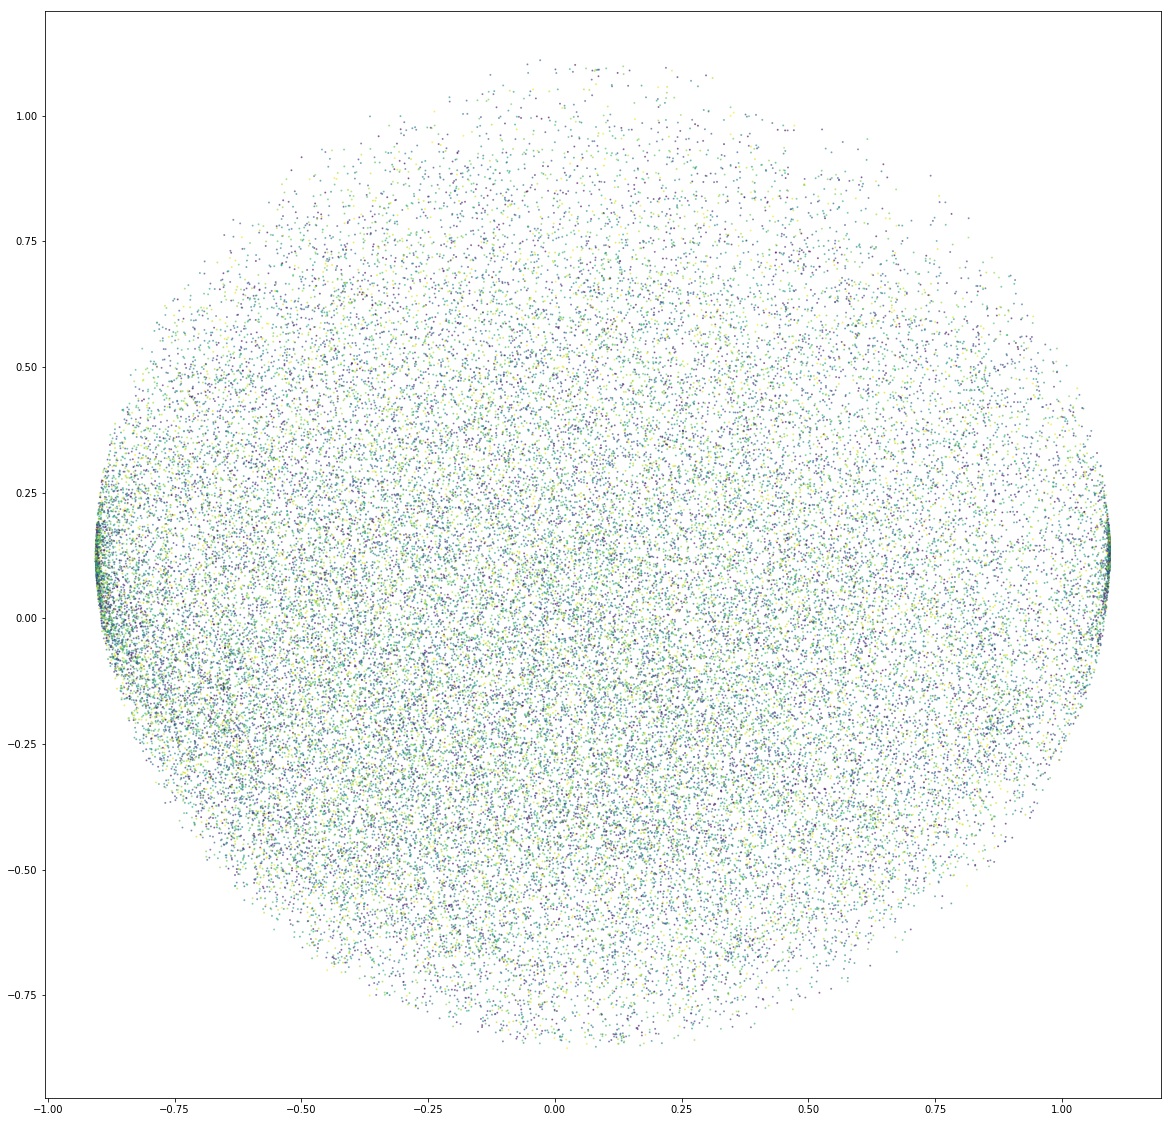

In [22]:
x, y = pca_data.T
colors = np.random.rand(N)
area = 1  # 0 to 15 point radii
plt.figure(figsize=(20,20))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

plt.show()

In [24]:
print (np.argmin(x))
print (np.argmax(x))
print (np.argsort(x))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    # Max on x-axis
    print(jokesData.iloc[3916][jokesData.iloc[3916] <= 10])
    print(jokesData.iloc[49277][jokesData.iloc[49277] <= 10])
    print(jokesData.iloc[11753][jokesData.iloc[11753] <= 10])

    # Min on x-axis
    print(jokesData.iloc[23910][jokesData.iloc[23910] <= 10])
    print(jokesData.iloc[48925][jokesData.iloc[48925] <= 10])
    print(jokesData.iloc[12852][jokesData.iloc[12852] <= 10])

23910
11753
[23910 48925 12852 ...  3916 49277 11753]
7      7.65625
8      7.81250
13     8.09375
15     8.31250
16     8.28125
17     8.31250
18     8.15625
19     8.15625
21     8.87500
26     8.00000
65     8.87500
70     9.68750
75     9.78125
81     9.46875
83     9.65625
87     9.03125
96     9.75000
98     9.81250
103    9.68750
125    9.93750
132    8.00000
136    9.68750
142    9.75000
Name: 3916, dtype: float64
7      7.56250
8      8.00000
13     8.00000
15     8.31250
16     8.34375
17     8.31250
18     8.28125
19     8.25000
21     8.75000
22     8.93750
24     8.40625
25     9.71875
26     8.50000
28     9.56250
29     9.40625
30     9.53125
32     9.50000
33    -8.18750
34     5.03125
35     2.81250
36     9.75000
39     9.46875
41     9.78125
42     9.43750
44     9.40625
46     9.37500
47     9.09375
48     9.56250
49     9.56250
50     9.12500
53     9.25000
54     9.50000
56     9.34375
57    -6.40625
58     9.53125
59     9.53125
62     9.50000
63     8.12500
64  

On the x-aixs of the reduced space tells us something about how the users who rate all positive or all negative. From the sample above we can see that three of the users who are on the far left of the plot have rated everything -10. Three of the users who are on the far right have rated everything 10.

In [26]:
print (np.argmin(y))
print (np.argmax(y))
print (np.argsort(y))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    # Max on y-axis
    print(jokesData.iloc[49726][jokesData.iloc[49726] <= 10])
    print(jokesData.iloc[12689][jokesData.iloc[12689] <= 10])
    print(jokesData.iloc[13096][jokesData.iloc[13096] <= 10])
    # Min on y-axis
    print(jokesData.iloc[9304][jokesData.iloc[9304] <= 10])
    print(jokesData.iloc[37516][jokesData.iloc[37516] <= 10])
    print(jokesData.iloc[10897][jokesData.iloc[10897] <= 10])

9304
13096
[ 9304 37516 10897 ... 49726 12689 13096]
7      9.25000
8      8.87500
13     8.87500
15     5.21875
16    -7.65625
17    -9.06250
18    -8.68750
19    -9.34375
29     4.21875
32     8.81250
35     7.43750
36    -0.93750
38     6.00000
47     8.62500
49     9.06250
50     7.50000
53     9.06250
54     8.81250
60     9.00000
62     1.31250
63     8.25000
65     9.00000
66     9.03125
68     7.03125
69     8.18750
72     8.56250
76     9.03125
78     9.43750
81     8.81250
84     9.43750
87     9.09375
89     8.78125
91     9.15625
93     9.28125
96     8.78125
97     9.09375
104    7.78125
105    0.84375
108    2.15625
109    9.00000
111    8.81250
114    8.65625
117    9.46875
119    8.34375
121    9.06250
122    9.09375
125    9.12500
126    9.37500
127    9.00000
128    9.03125
129   -7.06250
130    9.00000
132    6.68750
134    9.15625
135    9.18750
145    9.50000
148   -4.18750
Name: 49726, dtype: float64
7      9.34375
8      5.93750
13     7.71875
15     3.65625
16  

## Eigentaste

In [17]:
JOKE_CLUSTERS = 15
MOVING_AVERAGE_VECTOR_SIZE = 5


class Eigentaste(object):

    def __init__(self, train, gauge, levels=4):
        """
        Initializes Eigentaste with a training set and gauge set.

        :param train: The dataset on which Eigentaste must be trained.
        :param gauge: List of indices that define the gauge set.
        :param levels: The number of recursive levels for user clustering.
        :return: None
        """
        # Store training data and gauge set
        self.train = train
        self.gauge = gauge
        self.levels = levels

        # Store number of users and jokes
        self.users, self.jokes = self.train.shape

        # Impute missing values using mean imputation
        self.imputed_train = Imputer().fit_transform(self.train)

        # Create a new PCA model and fit it to the training data (gauge set
        # sub-matrix). The PCA model will be used to project new users into the
        # same plane as the rest of the data set.
        self.gauge_set_submatrix = self.imputed_train[:, gauge]
        self.pca_model = PCA(n_components=2)
        self.pca_data = self.pca_model.fit_transform(self.gauge_set_submatrix)

        # Split the projected data recursively into clusters
        self.clusters = self.create_clusters()
        # Assign the users to each cluster, generating a list of cluster indices
        self.indices = self.classify()
        # Generated the predicted value of joke ratings for each cluster
        self.predictions = self.calculate_predictions()

        # Split the jokes into joke clusters for dynamic recommendations
        self.kmeans_model = KMeans(n_clusters=JOKE_CLUSTERS)
        self.joke_clusters = self.create_joke_clusters()

    def create_clusters(self):
        """
        Creates a list of clusters by recursively bisecting those clusters that
        touch the origin
        """
        # Transpose data so that X and Y components are rows
        x, y = self.pca_data.T
        top_left = Point(np.min(x), np.max(y))
        bottom_right = Point(np.max(x), np.min(y))
        origin = (top_left + bottom_right)/2
        # Compute the bounding cluster which encompasses all the points in the
        # training set. The initial set of clusters is the set of 4 clusters
        # formed by the bisection of the bounding cluster.
        clusters = Cluster(top_left, bottom_right).bisect()
        # Recursively split the clusters
        for _ in range(self.levels):
            new_clusters = []
            for cluster in clusters:
                # Only split the cluster if one of the vertices is the origin
                if cluster.touches(origin):
                    new_clusters.extend(cluster.bisect())
                else:
                    new_clusters.append(cluster)
            # Repeat again with the newly created list of clusters
            clusters = new_clusters
        # Return the list of clusters
        return clusters

    def create_joke_clusters(self):
        """
        Fits the kmeans model to the training set, creates joke (i.e item)
        clusters and returns a vector containing the cluster index of each joke.
        """
        predictions = np.array(self.predictions)
        indices = self.kmeans_model.fit_predict(self.imputed_train.T)
        return [ItemCluster(indices == idx, predictions) for idx
                in range(JOKE_CLUSTERS)]

    def classify(self):
        """
        Classify users in the training set by assigning them to one of the clusters.
        """
        indices = []
        # Iterate through all users in the training set and assign them to clusters
        for user in self.pca_data:
            point = Point(*user)
            # Iterate through each cluster to see if user is in the cluster
            for idx, cluster in enumerate(self.clusters):
                if point in cluster:
                    indices.append(idx)
                    break
        # Convert to a numpy array for efficient operations
        return np.array(indices)

    def calculate_predictions(self):
        predictions = []
        for idx in range(len(self.clusters)):
            users = self.train[self.indices == idx]
            ratings = np.nanmean(users, axis=0).tolist()
            predictions.append(ratings)
        return predictions

    def export_model(self):
        pca_model = {'mean': self.pca_model.mean_.tolist(),
                     'components': self.pca_model.components_.tolist()}
        clusters = [cluster.export_model() for cluster in self.clusters]
        joke_clusters = [joke_cluster.export_model() for joke_cluster in
                         self.joke_clusters]
        exported_model = {'pca model': pca_model,
                          'user clusters': clusters,
                          'joke clusters': joke_clusters,
                          'predictions': self.predictions}
        return exported_model
    
    
class PCAModel(object):
    def __init__(self, model):
        self.mean = np.array(model['mean'])
        self.components = np.array(model['components'])

    def transform(self, user):
        user = np.array(user) - self.mean
        return np.dot(user, self.components.T)


class StoredEigentasteModel(object):
    def __init__(self, json_string):
        model = json.loads(json_string)
        self.pca_model = PCAModel(model['pca model'])
        self.clusters = [Cluster.import_model(cluster) for cluster in
                         model['user clusters']]
        self.joke_clusters = [ItemCluster.import_model(cluster) for cluster in
                              model['joke clusters']]
        self.predictions = model['predictions']

    def transform(self, user):
        return self.pca_model.transform(user)

    def classify(self, user):
        user = Point(*user)
        distances = [cluster.distance(user) for cluster in self.clusters]
        return np.argmin(distances)

    def moving_averages(self, cluster_idx):
        return [[cluster.moving_averages(cluster_idx)]
                * MOVING_AVERAGE_VECTOR_SIZE for cluster in self.joke_clusters]

    def recommend_joke(self, user):
        def all_rated(n):
            return user_model['jokes rated'][n] == self.joke_clusters[n].jokes

        user_model = user.load_model()
        moving_averages = user_model['moving averages']

        averages = [(idx, np.mean(ratings)) for idx, ratings in
                    enumerate(moving_averages) if not all_rated(idx)]

        item_cluster_idx, average = max(averages, key=operator.itemgetter(1))
        jokes_rated = user_model['jokes rated'][item_cluster_idx]
        user_cluster_idx = user_model['user cluster id']

        item_cluster = self.joke_clusters[item_cluster_idx]
        joke_id = item_cluster.recommend(user_cluster_idx, jokes_rated) + 1

        log_averages(user, averages)
        log_cluster_choice(user, item_cluster_idx, average)

        return Joke.objects.get(id=joke_id)

    def get_prediction(self, user, joke):
        user_model = user.load_model()
        cluster_id = user_model['user cluster id']
        return self.predictions[cluster_id][joke.id - 1]
    
from math import sqrt

__author__ = 'Viraj Mahesh'


class Point(object):
    """
    Represents a point in 2D space.
    """
    def __init__(self, x, y):
        """
        Create a new point.
        :param x: The x coordinate of the point
        :param y: The y coordinate of the point
        """
        self.x = x
        self.y = y

    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)

    def __div__(self, other):
        return Point(self.x/other, self.y/other)

    def __truediv__(self, other):
        return self.__div__(other)

    def _approx_equal(self, a, b, tolerance=10**-6):
        """
        Checks if two floating point numbers are approximately equal, given a
        certain tolerance.
        """
        return abs(a - b) <= tolerance

    def __eq__(self, other):
        """
        Returns true if two points are equal. Points are equal if their
        x and y coordinates are approximately equal.
        """
        return self._approx_equal(self.x, other.x) and \
               self._approx_equal(self.y, other.y)

    def __repr__(self):
        return '({0}, {1})'.format(self.x, self.y)

    def __str__(self):
        return self.__repr__()

    def __unicode__(self):
        return self.__repr__()

    def distance(self, point):
        return sqrt((self.x - point.x) ** 2 + (self.y - point.y) ** 2)

    def export_model(self):
        exported_point = {'x': float(self.x),
                          'y': float(self.y)}
        return exported_point

    @classmethod
    def import_model(self, model):
        return Point(model['x'], model['y'])
    
class Cluster(object):
    """
    Represents a rectangular cluster in 2D space. Clusters are denoted by the
    coordinates of the top left and bottom right corners.
    """
    def __init__(self, top_left, bottom_right):
        """
        Create a new cluster.
        :param top_left: The top left corner of the cluster.
        :param bottom_right: The bottom right corner of the cluster.
        """
        self.top_left = top_left
        self.bottom_right = bottom_right

    def bisect(self):
        """
        Splits the cluster into 4 equal sized sub-clusters
        :return: A list containing the 4 equal sized sub-clusters of this cluster
        """
        # Calculate midpoint of the cluster
        mid = (self.top_left + self.bottom_right)/2
        # Calculate midpoints of all edges of the cluster
        mid_top_edge = Point(mid.x, self.top_left.y)
        mid_bottom_edge = Point(mid.x, self.bottom_right.y)
        mid_left_edge = Point(self.top_left.x, mid.y)
        mid_right_edge = Point(self.bottom_right.x, mid.y)
        # Return the 4 sub clusters formed from dividing this cluster
        return [Cluster(self.top_left, mid),
                Cluster(mid, self.bottom_right),
                Cluster(mid_top_edge, mid_right_edge),
                Cluster(mid_left_edge, mid_bottom_edge)]

    def __repr__(self):
        return '({0}, {1})'.format(self.top_left, self.bottom_right)

    def __str__(self):
        return self.__repr__()

    def __unicode__(self):
        return self.__repr__()

    def touches(self, point):
        """
        :param point: The point we are checking.
        :return: True if point is one of the 4 corners of the clusters
        """
        bottom_left = Point(self.top_left.x, self.bottom_right.y)
        top_right = Point(self.bottom_right.x, self.top_left.y)
        return self.top_left == point or self.bottom_right == point or \
            bottom_left == point or top_right == point

    def __contains__(self, item):
        return self.top_left.x <= item.x <= self.bottom_right.x and \
               self.bottom_right.y <= item.y <= self.top_left.y

    def distance(self, point):
        return ((self.top_left + self.bottom_right)/2).distance(point)

    def w(self):
        return self.bottom_right.x - self.top_left.x

    def h(self):
        return self.top_left.y - self.bottom_right.y

    def export_model(self):
        exported_cluster = {'top left': self.top_left.export_model(),
                            'bottom right': self.bottom_right.export_model()}
        return exported_cluster

    @classmethod
    def import_model(self, model):
        top_left = Point.import_model(model['top left'])
        bottom_right = Point.import_model(model['bottom right'])
        return Cluster(top_left, bottom_right)
    from pprint import pprint


__author__ = 'Viraj Mahesh'


class ItemCluster(object):

    def __init__(self, indices=None, predictions=None):
        if indices is None or predictions is None:
            return
        self.indices = [idx for idx, val in enumerate(indices) if val]
        self.jokes = len(self.indices)
        self.predictions = predictions[:, self.indices]
        self.prediction_order = self.generate_prediction_order()
        self.averages = np.nanmean(self.predictions, axis=1)

    def export_model(self):
        exported_item_cluster = {'indices': self.indices,
                                 'jokes': int(self.jokes),
                                 'predictions': self.predictions.tolist(),
                                 'prediction order': self.prediction_order.tolist(),
                                 'averages': self.averages.tolist()}
        return exported_item_cluster

    @classmethod
    def import_model(cls, model):
        item_cluster = cls()
        item_cluster.indices = np.array(model['indices'])
        item_cluster.jokes = model['jokes']
        item_cluster.predictions = np.array(model['predictions'])
        item_cluster.prediction_order = np.array(model['prediction order'])
        item_cluster.averages = np.array(model['averages'])
        return item_cluster

    def recommend(self, user_cluster_id, jokes_rated):
        return self.indices[
            self.prediction_order[user_cluster_id][-jokes_rated - 1]
        ]

    def moving_averages(self, cluster_idx):
        return self.averages[cluster_idx]

    def generate_prediction_order(self):
        return np.argsort(self.predictions, axis=1)

    def __repr__(self):
        return 'ItemCluster(items={0})'.format(self.jokes)

    def __str__(self):
        return self.__repr__()

    def __unicode__(self):
        return self.__repr__()

In [18]:
eigentaste = Eigentaste(train=X, gauge=[7, 8, 13, 15, 16, 17, 18, 19], levels=4)

/home/senbyo/documents/dtu/acda/case2/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/senbyo/documents/dtu/acda/case2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:103: RuntimeWarning: Mean of empty slice
/home/senbyo/documents/dtu/acda/case2/venv/lib/python3.6/site-packages/ipykernel_launcher.py:331: RuntimeWarning: Mean of empty slice


In [19]:
print (len(eigentaste.predictions))
print(len(X))

52
50692


In [20]:
print("Normalized Mean Absoulte Error error for user mean for all data: {}".format(np.mean(ErrorNMAE)))
print("Mean Absoulte Error error for user mean for all data: {}".format(np.mean(ErrorMAE)))

Normalized Mean Absoulte Error error for user mean for all data: 0.23033441661482726
Mean Absoulte Error error for user mean for all data: 4.606688332296545
